In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ress = pd.read_csv("KCSE_2016.csv", header=0, sep=",", skipinitialspace=True)
alls = pd.read_csv("All_Cs.csv", header=0, sep=",")
fems = pd.read_csv("Fems.csv", header=0, sep=",")
quals = pd.read_csv("UniQual.csv", header=0, sep=",")

In [2]:
print(ress)

          Gender     A     A-     B+      B     B-     C+      C     C-  \
0   FEMALE(2016)    58   2685   6581  10204  13649  17238  22960  30979   
1     MALE(2016)    83   1960   4394   7012  10096  14969  21832  30047   
2      ALL(2016)   141   4645  10975  17216  23745  32207  44792  61026   
3     MALE(2015)  2024   7952  13517  19826  25312  29556  33437  37482   
4   FEMALE(2015)   661   4117   8410  13634  19269  25214  31476  36633   
5      ALL(2015)  2685  12069  21927  33460  44581  54770  64913  74115   
6     MALE(2006)   148    638   1195   1627   2108   2569   2984   3299   
7   FEMALE(2006)    69    242    446    772   1234   1873   2554   3193   
8      ALL(2006)   217    880   1641   2399   3342   4442   5538   6492   
9     MALE(2007)   110    563   1159   1761   2268   2871   3314   3609   
10  FEMALE(2007)    50    191    473    844   1339   2100   2865   3439   
11     ALL(2007)   160    754   1632   2605   3607   4971   6179   7048   
12    MALE(2008)   102   

In [3]:
print(ress.info())
print(ress.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  21 non-null     object
 1   A       21 non-null     int64 
 2   A-      21 non-null     int64 
 3   B+      21 non-null     int64 
 4   B       21 non-null     int64 
 5   B-      21 non-null     int64 
 6   C+      21 non-null     int64 
 7   C       21 non-null     int64 
 8   C-      21 non-null     int64 
 9   D+      21 non-null     int64 
 10  D       21 non-null     int64 
 11  D-      21 non-null     int64 
 12  E       21 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.3+ KB
None
                 A            A-            B+             B            B-  \
count    21.000000     21.000000     21.000000     21.000000     21.000000   
mean    366.285714   2038.285714   4067.047619   6222.095238   8427.142857   
std     681.671559   2987.416779   5483.405652   8378.130101  11152

In [4]:
print(ress.sort_values("Gender"))
print(ress.iloc[0:4])

          Gender     A     A-     B+      B     B-     C+      C     C-  \
8      ALL(2006)   217    880   1641   2399   3342   4442   5538   6492   
11     ALL(2007)   160    754   1632   2605   3607   4971   6179   7048   
14     ALL(2008)   168    972   2009   2877   3886   5101   6409   7442   
17     ALL(2009)   196    846   1989   3098   4355   5699   7040   8243   
20     ALL(2010)   279   1236   2531   3677   4969   6361   7805   8925   
5      ALL(2015)  2685  12069  21927  33460  44581  54770  64913  74115   
2      ALL(2016)   141   4645  10975  17216  23745  32207  44792  61026   
7   FEMALE(2006)    69    242    446    772   1234   1873   2554   3193   
10  FEMALE(2007)    50    191    473    844   1339   2100   2865   3439   
13  FEMALE(2008)    66    274    596    920   1417   2129   2946   3618   
16  FEMALE(2009)    58    218    553    974   1572   2388   3216   3996   
19  FEMALE(2010)    97    344    744   1219   1875   2722   3637   4389   
4   FEMALE(2015)   661   

In [5]:
ress[["Gender", "Year"]] = ress["Gender"].str.split("(", expand=True)
ress[["Year", "Noo"]] = ress["Year"].str.split(")", expand=True)

ress = ress.drop(columns=["Noo"])

cols_pos = list(ress.columns)
ress = ress[[cols_pos[0]] + [cols_pos[-1]] + cols_pos[1:15]]

ress = ress.loc[:, ~ress.columns.duplicated()]

ress["Total"] = ress.iloc[:, 2:].sum(axis=1)

ress = ress.sort_values(["Year", "Gender"], ascending=[1, 0])

In [6]:
print(ress)

    Gender  Year     A     A-     B+      B     B-     C+      C     C-  \
6     MALE  2006   148    638   1195   1627   2108   2569   2984   3299   
7   FEMALE  2006    69    242    446    772   1234   1873   2554   3193   
8      ALL  2006   217    880   1641   2399   3342   4442   5538   6492   
9     MALE  2007   110    563   1159   1761   2268   2871   3314   3609   
10  FEMALE  2007    50    191    473    844   1339   2100   2865   3439   
11     ALL  2007   160    754   1632   2605   3607   4971   6179   7048   
12    MALE  2008   102    698   1413   1957   2469   2972   3463   3824   
13  FEMALE  2008    66    274    596    920   1417   2129   2946   3618   
14     ALL  2008   168    972   2009   2877   3886   5101   6409   7442   
15    MALE  2009   138    628   1436   2124   2783   3311   3824   4247   
16  FEMALE  2009    58    218    553    974   1572   2388   3216   3996   
17     ALL  2009   196    846   1989   3098   4355   5699   7040   8243   
18    MALE  2010   182   

In [7]:
print(quals)

    Unnamed: 0  Gender  Year     A     A-     B+      B     B-     C+
0            6    MALE  2006   148    638   1195   1627   2108   2569
1            7  FEMALE  2006    69    242    446    772   1234   1873
2            8     ALL  2006   217    880   1641   2399   3342   4442
3            9    MALE  2007   110    563   1159   1761   2268   2871
4           10  FEMALE  2007    50    191    473    844   1339   2100
5           11     ALL  2007   160    754   1632   2605   3607   4971
6           12    MALE  2008   102    698   1413   1957   2469   2972
7           13  FEMALE  2008    66    274    596    920   1417   2129
8           14     ALL  2008   168    972   2009   2877   3886   5101
9           15    MALE  2009   138    628   1436   2124   2783   3311
10          16  FEMALE  2009    58    218    553    974   1572   2388
11          17     ALL  2009   196    846   1989   3098   4355   5699
12          18    MALE  2010   182    892   1787   2458   3094   3639
13          19  FEMA

In [8]:
quals.drop(quals.columns[quals.columns.str.contains("unnamed", case=False)], axis=1, inplace=True)

In [9]:
print(quals)

    Gender  Year     A     A-     B+      B     B-     C+
0     MALE  2006   148    638   1195   1627   2108   2569
1   FEMALE  2006    69    242    446    772   1234   1873
2      ALL  2006   217    880   1641   2399   3342   4442
3     MALE  2007   110    563   1159   1761   2268   2871
4   FEMALE  2007    50    191    473    844   1339   2100
5      ALL  2007   160    754   1632   2605   3607   4971
6     MALE  2008   102    698   1413   1957   2469   2972
7   FEMALE  2008    66    274    596    920   1417   2129
8      ALL  2008   168    972   2009   2877   3886   5101
9     MALE  2009   138    628   1436   2124   2783   3311
10  FEMALE  2009    58    218    553    974   1572   2388
11     ALL  2009   196    846   1989   3098   4355   5699
12    MALE  2010   182    892   1787   2458   3094   3639
13  FEMALE  2010    97    344    744   1219   1875   2722
14     ALL  2010   279   1236   2531   3677   4969   6361
15    MALE  2015  2024   7952  13517  19826  25312  29556
16  FEMALE  20

In [10]:
print(alls)

   Unnamed: 0 Gender  Year     A     A-     B+      B     B-     C+      C  \
0           8    ALL  2006   217    880   1641   2399   3342   4442   5538   
1          11    ALL  2007   160    754   1632   2605   3607   4971   6179   
2          14    ALL  2008   168    972   2009   2877   3886   5101   6409   
3          17    ALL  2009   196    846   1989   3098   4355   5699   7040   
4          20    ALL  2010   279   1236   2531   3677   4969   6361   7805   
5           5    ALL  2015  2685  12069  21927  33460  44581  54770  64913   
6           2    ALL  2016   141   4645  10975  17216  23745  32207  44792   

      C-     D+       D      D-      E   Total  
0   6492   6937    6804    5544   1731   45967  
1   7048   7538    7223    5686   1569   48972  
2   7442   8024    8092    6993   2755   54728  
3   8243   8849    8850    7503   2583   59251  
4   8925   9438    9330    7788   2610   64949  
5  74115  79157   79555   48658   5350  521240  
6  61026  80951  112135  149929 

In [11]:
alls.drop(alls.columns[alls.columns.str.contains("unnamed", case=False)], axis=1, inplace=True)
print(alls)

  Gender  Year     A     A-     B+      B     B-     C+      C     C-     D+  \
0    ALL  2006   217    880   1641   2399   3342   4442   5538   6492   6937   
1    ALL  2007   160    754   1632   2605   3607   4971   6179   7048   7538   
2    ALL  2008   168    972   2009   2877   3886   5101   6409   7442   8024   
3    ALL  2009   196    846   1989   3098   4355   5699   7040   8243   8849   
4    ALL  2010   279   1236   2531   3677   4969   6361   7805   8925   9438   
5    ALL  2015  2685  12069  21927  33460  44581  54770  64913  74115  79157   
6    ALL  2016   141   4645  10975  17216  23745  32207  44792  61026  80951   

        D      D-      E   Total  
0    6804    5544   1731   45967  
1    7223    5686   1569   48972  
2    8092    6993   2755   54728  
3    8850    7503   2583   59251  
4    9330    7788   2610   64949  
5   79555   48658   5350  521240  
6  112135  149929  33399  571161  


In [27]:
### NB: An error is on the bar chart below
# Legend ovelaps values
# Legend contains parameters for Quality

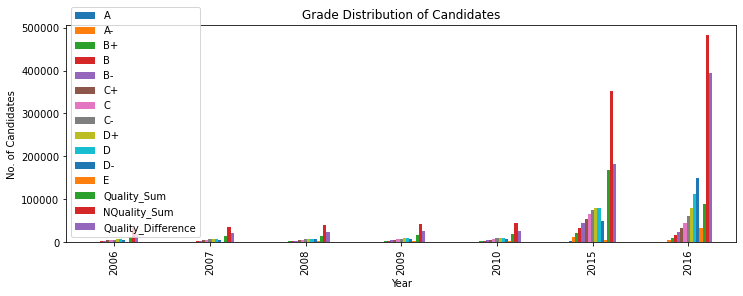

In [25]:

alls_bar = alls.plot.bar(figsize = (12,4))
plt.xlabel("Year")
plt.ylabel("No. of Candidates")
plt.title("Grade Distribution of Candidates")
plt.show()

# plt.plot.bar()
# print(alls_bar)


In [13]:
fems.drop(fems.columns[fems.columns.str.contains("unnamed", case=False)], axis=1, inplace=True)
print(fems)

   Gender  Year    A    A-    B+      B     B-     C+      C     C-     D+  \
0  FEMALE  2006   69   242   446    772   1234   1873   2554   3193   3519   
1  FEMALE  2007   50   191   473    844   1339   2100   2865   3439   3817   
2  FEMALE  2008   66   274   596    920   1417   2129   2946   3618   4043   
3  FEMALE  2009   58   218   553    974   1572   2388   3216   3996   4447   
4  FEMALE  2010   97   344   744   1219   1875   2722   3637   4389   4734   
5  FEMALE  2015  661  4117  8410  13634  19269  25214  31476  36633  38976   
6  FEMALE  2016   58  2685  6581  10204  13649  17238  22960  30979  41632   

       D     D-      E   Total  
0   3513   2909    897   21221  
1   3730   2924    790   22562  
2   4150   3593   1376   25128  
3   4514   3897   1326   27159  
4   4769   4012   1304   29846  
5  39113  23127   2223  242853  
6  57487  77718  18007  299198  


In [22]:
alls.set_index("Year", drop=True, inplace=True)
alls = alls.drop(columns="Total")
alls = alls.drop(columns=["0"])
print(alls)


     Gender     A     A-     B+      B     B-     C+      C     C-     D+  \
Year                                                                        
2006    ALL   217    880   1641   2399   3342   4442   5538   6492   6937   
2007    ALL   160    754   1632   2605   3607   4971   6179   7048   7538   
2008    ALL   168    972   2009   2877   3886   5101   6409   7442   8024   
2009    ALL   196    846   1989   3098   4355   5699   7040   8243   8849   
2010    ALL   279   1236   2531   3677   4969   6361   7805   8925   9438   
2015    ALL  2685  12069  21927  33460  44581  54770  64913  74115  79157   
2016    ALL   141   4645  10975  17216  23745  32207  44792  61026  80951   

           D      D-      E  Quality_Sum  NQuality_Sum  Quality_Difference  
Year                                                                        
2006    6804    5544   1731        12921         33046               20125  
2007    7223    5686   1569        13729         35243               21514 

In [14]:
# How do quality grades compare to non-quality grades?

In [15]:
alls["Quality_Sum"] = alls["A"] + alls["A-"] + alls["B+"] + alls["B"] + alls["B-"] + alls["C+"]

alls["NQuality_Sum"] = alls["C"] + alls["C-"] + alls["D+"] + alls["D"] + alls["D-"] + alls["E"]

alls["Quality_Difference"] = alls["NQuality_Sum"] - alls["Quality_Sum"]
print(alls)

  Gender  Year     A     A-     B+      B     B-     C+      C     C-     D+  \
0    ALL  2006   217    880   1641   2399   3342   4442   5538   6492   6937   
1    ALL  2007   160    754   1632   2605   3607   4971   6179   7048   7538   
2    ALL  2008   168    972   2009   2877   3886   5101   6409   7442   8024   
3    ALL  2009   196    846   1989   3098   4355   5699   7040   8243   8849   
4    ALL  2010   279   1236   2531   3677   4969   6361   7805   8925   9438   
5    ALL  2015  2685  12069  21927  33460  44581  54770  64913  74115  79157   
6    ALL  2016   141   4645  10975  17216  23745  32207  44792  61026  80951   

        D      D-      E   Total  Quality_Sum  NQuality_Sum  \
0    6804    5544   1731   45967        12921         33046   
1    7223    5686   1569   48972        13729         35243   
2    8092    6993   2755   54728        15013         39715   
3    8850    7503   2583   59251        16183         43068   
4    9330    7788   2610   64949        1905